/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/125 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2035 - loss: 1.9940
Epoch 1: val_loss improved from inf to 1.84547, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.2039 - loss: 1.9917 - val_accuracy: 0.2740 - val_loss: 1.8455 - learning_rate: 0.0010
Epoch 2/200
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2412 - loss: 1.8288
Epoch 2: val_loss did not improve from 1.84547
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.2412 - loss: 1.8290 - val_accuracy: 0.2150 - val_loss: 1.8749 - learning_rate: 0.0010
Epoch 3/200
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2533 - loss: 1.8027
Epoch 3: val_loss did not improve from 1.84547
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2534 - loss: 1.8025 - val_accuracy: 0.2530 - val_loss: 1.8818 - learning_rate: 0.0010
Epoch 4/200
122/125 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2907 - loss: 1.7676
Epoch 4: val_loss did not improve from 1.84547
125/125 ━━

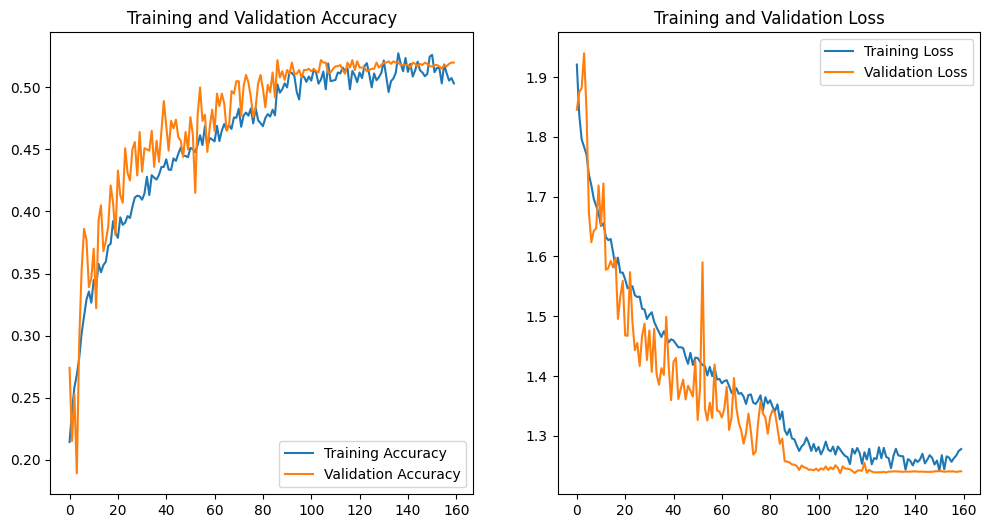

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, BatchNormalization, Activation, AveragePooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Parameters
batch_size = 32
num_epochs = 200
num_classes = 7
patience = 50
input_shape = (48, 48, 1)  # The input image is 48x48

# Load the dataset
def load_data(train_file, test_file):
    train_data = pd.read_csv('/content/train_dataset.csv.zip')
    test_data = pd.read_csv('/content/train_dataset.csv.zip')
    return train_data, test_data

# Data preprocessing function
def preprocess_data(data, is_train=True):
    X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data['pixels']])
    X = X / 255.0  # Normalize the pixel values

    if is_train:
        y = to_categorical(data['emotion'], num_classes=num_classes)
        return X, y
    return X

# Build the model
def build_model():
    model = Sequential()

    model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.5))

    model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.5))

    model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.5))

    model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.5))

    model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    return model

# Load and preprocess data
train_file = '/path_to_your/train.csv'
test_file = '/path_to_your/test.csv'
train_data, test_data = load_data(train_file, test_file)

# Preprocess train and test datasets
X_train, y_train = preprocess_data(train_data)
X_test = preprocess_data(test_data, is_train=False)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data generator with augmentation
data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Compile and train the model
model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
csv_logger = CSVLogger('training.log')
early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(patience / 4), verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True)
callbacks = [csv_logger, early_stop, reduce_lr, model_checkpoint]

# Train the model
history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=num_epochs,
    callbacks=callbacks
)

# Make predictions on the test set
test_predictions = model.predict(X_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Save the results to a CSV file
test_data['emotion'] = test_predicted_labels
test_data[['id', 'emotion']].to_csv('mobilenet_predictions.csv', index=False)
print("Predictions saved to mobilenet_predictions.csv")

# Plot training & validation accuracy and loss
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Call the plotting function
plot_training(history)



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
def load_test_data(test_file):
    test_data = pd.read_csv(test_file)
    return test_data

# Data preprocessing function for test data
def preprocess_test_data(data):
    X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data['pixels']])
    X = X / 255.0  # Normalize the pixel values
    return X

# Provide the path for the test CSV file
test_file = '/content/test_dataset.csv.zip'

# Load and preprocess the test dataset
test_data = load_test_data(test_file)
X_test = preprocess_test_data(test_data)

# Load the best model saved during training
best_model = load_model('best_model.keras')

# Initialize default test loss and accuracy
test_loss, test_acc = None, None

# Evaluate on the test set
try:
    test_loss, test_acc = best_model.evaluate(X_test, verbose=1)
    print(f"Test Accuracy: {test_acc*100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
except ValueError as e:
    print("Error during evaluation:", e)
    print("Ensure that the test data shape matches the input shape expected by the model.")

# Predict the emotions on the test data using the best model
test_predictions = best_model.predict(X_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Save the test predictions to a CSV file
test_data['emotion'] = test_predicted_labels
test_data[['id', 'emotion']].to_csv('mobilenet_predictions_9_FINAL.csv', index=False)
print("Final predictions saved to mobilenet_predictions_9_FINAL.csv")

# Plot the test accuracy and loss if evaluation was successful
def plot_test_performance(test_loss, test_acc):
    if test_loss is not None and test_acc is not None:
        plt.figure(figsize=(6, 4))
        plt.bar(['Test Accuracy', 'Test Loss'], [test_acc * 100, test_loss], color=['green', 'red'])
        plt.title('Test Performance Metrics')
        plt.ylabel('Percentage' if test_acc else 'Loss')
        plt.show()
    else:
        print("Test performance metrics not available due to an error during evaluation.")

# Call the plotting function to display test accuracy and loss
plot_test_performance(test_loss, test_acc)



Error during evaluation: None values not supported.
Ensure that the test data shape matches the input shape expected by the model.
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Final predictions saved to mobilenet_predictions_9_FINAL.csv
Test performance metrics not available due to an error during evaluation.


model 2

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess data from CSV
def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    return train_data, test_data

def preprocess_data(data, is_train=True):
    X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data['pixels']])
    X = np.stack([X]*3, axis=-1)  # Convert to 3-channel (RGB)
    X = X / 255.0  # Normalize pixel values
    if is_train:
        y = tf.keras.utils.to_categorical(data['emotion'], num_classes=7)
        return X, y
    return X

# Load data
train_file = '/content/train_dataset.csv.zip'
test_file = '/content/test_dataset.csv.zip'
train_data, test_data = load_data(train_file, test_file)

# Preprocess train and test datasets
X_train, y_train = preprocess_data(train_data)
X_test = preprocess_data(test_data, is_train=False)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Build the model using EfficientNetB0 as the base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
csv_logger = CSVLogger('training.log')
early_stop = EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

callbacks = [csv_logger, early_stop, reduce_lr, model_checkpoint]

# Train the model
history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks
)

# Load the best model
best_model = tf.keras.models.load_model('best_model.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(X_test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Predict the emotions on the test data
test_predictions = best_model.predict(X_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Save the test predictions to a CSV file
test_data['emotion'] = test_predicted_labels
test_data[['id', 'emotion']].to_csv('efficientnet_predictions.csv', index=False)
print("Predictions saved to efficientnet_predictions.csv")

# Plot training and validation accuracy and loss
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Call the plotting function
plot_training(history)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


ValueError: Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape (4000, 48, 48, 1, 3)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess data from CSV
# Load and preprocess data from CSV
def load_data(train_file, test_file):
    train_data = pd.read_csv('/content/train_dataset.csv.zip')
    test_data = pd.read_csv('/content/test_dataset.csv.zip')
    return train_data, test_data

def preprocess_data(data, is_train=True):
    X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data['pixels']])
    #X = np.concatenate([X]*3, axis=-1)  # Ensure data is in RGB format
    X = X / 255.0
    if is_train:
        y = tf.keras.utils.to_categorical(data['emotion'], num_classes=7)
        return X, y
    return X

# Load data
train_file = '/path_to_your/train.csv'
test_file = '/path_to_your/test.csv'
train_data, test_data = load_data(train_file, test_file)

# Preprocess train and test datasets
X_train, y_train = preprocess_data(train_data)
X_test = preprocess_data(test_data, is_train=False)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

def train_data_generator():
    while True:
        for batch in data_generator.flow(X_train, y_train, batch_size=32):
            yield batch

train_dataset = tf.data.Dataset.from_generator(
    train_data_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32), # Changed from 3 to 1
        tf.TensorSpec(shape=(None, 7), dtype=tf.float32)
    )
).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)

# Rebuild the model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3)) # This needs to be 3

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model with the correct input shape
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
csv_logger = CSVLogger('training.log')
early_stop = EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

callbacks = [csv_logger, early_stop, reduce_lr, model_checkpoint]

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,  # Increased epochs
    steps_per_epoch=len(X_train) // 32,
    callbacks=callbacks
)

# Load the best model
try:
    best_model = tf.keras.models.load_model('best_model.keras')
except ValueError as e:
    print(f"Error loading model: {e}")
    # Handle or reconfigure the issue if needed

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(X_test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Predict the emotions on the test data
test_predictions = best_model.predict(X_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Save the test predictions to a CSV file
test_data['emotion'] = test_predicted_labels
test_data[['id', 'emotion']].to_csv('efficientnet_predictions.csv', index=False)
print("Predictions saved to efficientnet_predictions.csv")
# Plot training and validation accuracy and loss
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Call the plotting function
plot_training(history)


Epoch 1/200
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1694 - loss: 2.1751
Epoch 1: val_loss improved from inf to 1.94079, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 85s 118ms/step - accuracy: 0.1696 - loss: 2.1743 - val_accuracy: 0.2700 - val_loss: 1.9408 - learning_rate: 1.0000e-04
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2217 - loss: 2.0052
Epoch 2: val_loss did not improve from 1.94079
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.2217 - loss: 2.0050 - val_accuracy: 0.2140 - val_loss: 1.9959 - learning_rate: 1.0000e-04
Epoch 3/200
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2603 - loss: 1.8794
Epoch 3: val_loss did not improve from 1.94079
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2601 - loss: 1.8793 - val_accuracy: 0.1340 - val_loss: 2.0152 - learning_rate: 1.0000e-04
Epoch 4/200
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2667 - loss: 1.8422
Epoch 4: val_loss did not improve

ValueError: None values not supported.

11/9/2024

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess data from CSV
def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    return train_data, test_data

def preprocess_data(data, is_train=True):
    X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data['pixels']])
    X = np.repeat(X, 3, axis=-1)  # Convert to 3-channel (RGB)
    X = X / 255.0  # Normalize pixel values
    if is_train:
        y = tf.keras.utils.to_categorical(data['emotion'], num_classes=7)
        return X, y
    return X

# Load data
train_file = '/content/train_dataset.csv.zip'
test_file = '/content/test_dataset.csv.zip'
train_data, test_data = load_data(train_file, test_file)

# Preprocess train and test datasets
X_train, y_train = preprocess_data(train_data)
X_test = preprocess_data(test_data, is_train=False)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rebuild the model with correct input shape for EfficientNet
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))  # 3-channel input

# Ensure to only pass the output of the base model to the subsequent layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
csv_logger = CSVLogger('training.log')
early_stop = EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

callbacks = [csv_logger, early_stop, reduce_lr, model_checkpoint]

# Train the model
history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=200,
    steps_per_epoch=len(X_train) // 32,
    callbacks=callbacks
)

# Load the best model
best_model = tf.keras.models.load_model('best_model.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(X_test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Predict the emotions on the test data
test_predictions = best_model.predict(X_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Save the test predictions to a CSV file
test_data['emotion'] = test_predicted_labels
test_data[['id', 'emotion']].to_csv('efficientnet_predictions.csv', index=False)
print("Predictions saved to efficientnet_predictions.csv")

# Plot training and validation accuracy and loss
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Call the plotting function
plot_training(history)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1895 - loss: 2.1238
Epoch 1: val_loss improved from inf to 2.16684, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 151ms/step - accuracy: 0.1895 - loss: 2.1227 - val_accuracy: 0.1540 - val_loss: 2.1668 - learning_rate: 1.0000e-04
Epoch 2/200


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 2.16684
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1540 - val_loss: 2.1668 - learning_rate: 1.0000e-04
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2164 - loss: 1.9685
Epoch 3: val_loss improved from 2.16684 to 2.05234, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.2164 - loss: 1.9683 - val_accuracy: 0.1290 - val_loss: 2.0523 - learning_rate: 1.0000e-04
Epoch 4/200

Epoch 4: val_loss did not improve from 2.05234
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1290 - val_loss: 2.0523 - learning_rate: 1.0000e-04
Epoch 5/200
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2476 - loss: 1.9033
Epoch 5: val_loss improved from 2.05234 to 1.97438, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.2476 - loss: 1.9030 - val_accuracy: 0.

ValueError: Layer "dense_2" expects 1 input(s), but it received 2 input tensors. Inputs received: [<KerasTensor shape=(None, 2, 2, 1280), dtype=float32, sparse=False, name=keras_tensor_1498>, <KerasTensor shape=(None, 2, 2, 1280), dtype=float32, sparse=False, name=keras_tensor_1499>]